# BHARAT INTERN

# VIRTUAL INTERNSHIP ON "MACHINE LEARNING" [JUNE 10 2023]

# 1. House Price Prediction

# 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("housing.csv")

In [36]:
df.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [37]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [38]:
df.shape

(414, 8)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [40]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [41]:
counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [42]:
from sklearn.preprocessing import LabelEncoder
categ = ['X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [43]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,5,10,210,143,129
1,2,2012.917,19.5,59,9,188,132,162
2,3,2013.583,13.3,134,5,225,188,200
3,4,2013.500,13.3,134,5,225,188,234
4,5,2012.833,5.0,90,5,183,167,170


<Axes: >

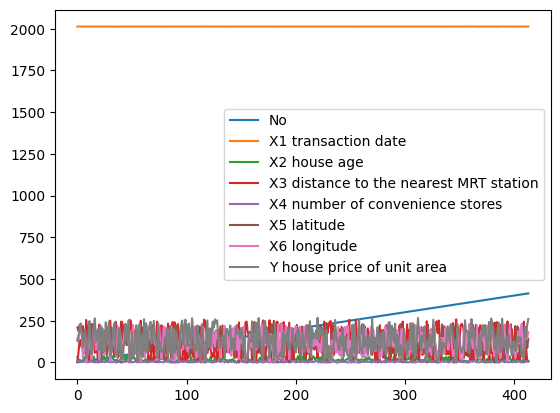

In [44]:
df.plot()


<Axes: >

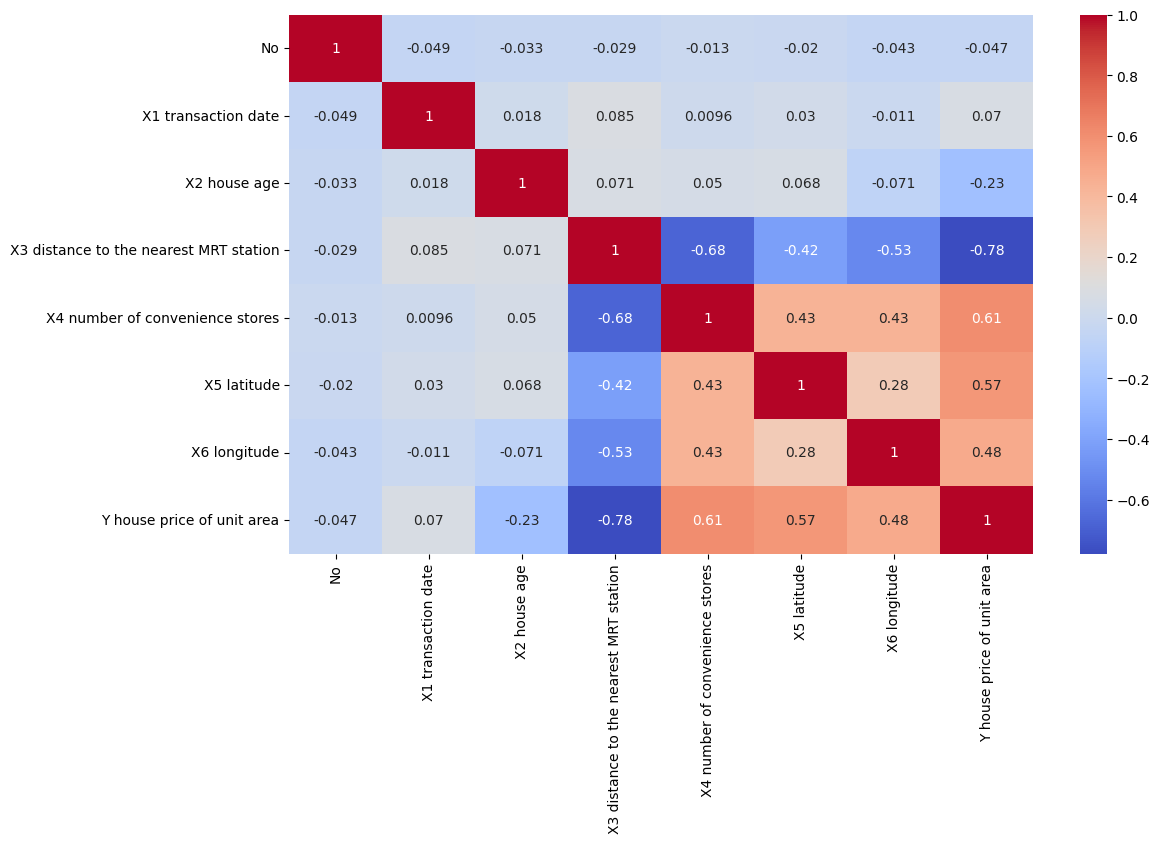

In [45]:
corr = df.corr()
plt.figure(figsize = (12,7))
sns.heatmap(corr,cmap="coolwarm",annot=True)

In [46]:
X = df.drop(['No'],axis=1)
Y = df['No']

In [47]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,5,10,210,143,129
1,2012.917,19.5,59,9,188,132,162
2,2013.583,13.3,134,5,225,188,200
3,2013.500,13.3,134,5,225,188,234
4,2012.833,5.0,90,5,183,167,170
...,...,...,...,...,...,...,...
409,2013.000,13.7,245,0,4,14,14
410,2012.667,5.6,7,9,142,181,214
411,2013.250,18.8,91,7,180,137,150
412,2013.000,8.1,8,5,87,148,226


In [48]:
Y

0        1
1        2
2        3
3        4
4        5
      ... 
409    410
410    411
411    412
412    413
413    414
Name: No, Length: 414, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=45)

In [49]:
len(X_train),len(X_test)

(289, 125)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [51]:
X= df.iloc[:,:-1].values
Y= df.iloc[:,1].values

In [52]:
model.fit(X_train,Y_train)

LinearRegression()

In [53]:
Y_predict = model.predict(X_test)

In [54]:
Y_predict

array([217.64129037, 231.43264636, 165.40898617, 247.09589941,
       205.76271061, 201.79466859, 187.28652467, 177.40128547,
       205.37390453, 212.65287334, 187.69578109, 188.28083438,
       206.94231689, 192.14072017, 198.74867724, 196.35912233,
       172.08666033, 179.7906557 , 218.75237328, 186.2941101 ,
       229.75707025, 216.96570476, 211.64083624, 223.25007592,
       124.00176982, 210.12793512, 196.11434714, 214.78805712,
       195.87900488, 172.40330833, 175.25570329, 219.71570145,
       207.11467184, 190.87043847, 219.04694605, 206.19349916,
       196.69365757, 186.82175417, 230.70909777, 192.07689055,
       183.6740198 , 202.22430364, 199.16705632, 196.78494054,
       198.42409355, 228.39187833, 202.50067667, 202.07910914,
       208.68115616, 213.48089088, 199.19161701, 190.99951842,
       198.89955305, 194.99870279, 240.85406373, 222.17948245,
       227.08004978, 165.87321573, 219.69513881, 209.57350959,
       180.23857309, 180.83783969, 193.79647125, 255.15

In [55]:
from sklearn.metrics import r2_score,mean_absolute_error
score  = r2_score(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)

In [56]:
score

-0.025250890899339407

In [57]:
mae

99.9437238748406